In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv('/content/Mall_Customers.csv')
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [5]:
x = df.iloc[:,3:]
x

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


In [7]:
from sklearn.cluster import KMeans

In [10]:
wcss = []
for i in range(1,15):
  kmean = KMeans(n_clusters=i, init='k-means++', random_state=30)
  kmean.fit(x)
  wcss.append(kmean.inertia_)

In [11]:
wcss

[269981.28000000014,
 184609.98434090626,
 106348.37306211119,
 82472.19413919412,
 44448.45544793369,
 37455.98455516028,
 32277.023173884925,
 30659.650406115616,
 23770.1169812072,
 21775.64608111187,
 19290.207589048383,
 17827.131139773017,
 14971.026961342752,
 14294.93233842181]

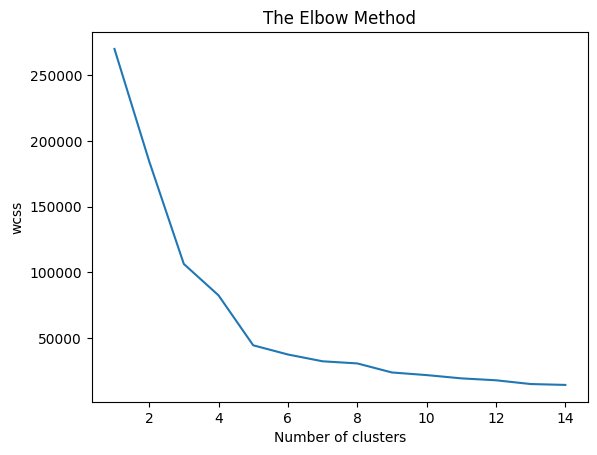

In [12]:
plt.plot(range(1,15),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('wcss')
plt.show()

In [14]:
kmean1=KMeans(n_clusters=5, init='k-means++', random_state=30)
kmean1.fit_predict(x)

array([4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1,
       4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 2,
       4, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 0, 3, 2, 3, 0, 3, 0, 3,
       2, 3, 0, 3, 0, 3, 0, 3, 0, 3, 2, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3], dtype=int32)

In [15]:
x['cluster number'] = kmean1.fit_predict(x)
x

,Annual Income (k$),Spending Score (1-100),cluster number
0,15,39,4
1,15,81,1
2,16,6,4
3,16,77,1
4,17,40,4
...,...,...,...
195,120,79,3
196,126,28,0
197,126,74,3
198,137,18,0


In [16]:
x[x['cluster number']==4]   ##selecting all the dataset belonging to cluster number 4

,Annual Income (k$),Spending Score (1-100),cluster number
0,15,39,4
2,16,6,4
4,17,40,4
6,18,6,4
8,19,3,4
10,19,14,4
12,20,15,4
14,20,13,4
16,21,35,4
18,23,29,4


In [17]:
from sklearn.cluster import DBSCAN

In [33]:
dbscan = DBSCAN(eps=5, min_samples=5)
dbscan.fit(x)

DBSCAN(eps=5)

In [34]:
x

,Annual Income (k$),Spending Score (1-100),cluster number
0,15,39,4
1,15,81,1
2,16,6,4
3,16,77,1
4,17,40,4
...,...,...,...
195,120,79,3
196,126,28,0
197,126,74,3
198,137,18,0


In [36]:
set(dbscan.labels_)   #these are the number of clusters

{-1, 0, 1, 2, 3, 4}

-1 dataset does not need to accomodate within any of the clusters which is why it is -1